In [1]:
from scipy.io import loadmat
import os
import torch
from torch import nn
from torchvision import transforms, models
from PIL import Image
from sklearn.model_selection import train_test_split
from transformers import AutoModel, BertTokenizerFast, AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch import optim
import time
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import statistics
from statistics import NormalDist
import random
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.utils import save_image
import gc


from classifier_modules import BERT_Arch, classify
from generator_modules import Generator, denorm, inference


In [2]:
project_root = "/app/jupyter_space/sample-project/demo/"

# txtmodel_model_path = os.path.join(project_root, 'models/Text_Model_resnet34.pt')
# imgmodel_model_path = os.path.join(project_root, 'models/Image_Model_resnet34.pt')
txtmodel_model_path = os.path.join(project_root, 'models/Text_Model_googlenet.pt')
imgmodel_model_path = os.path.join(project_root, 'models/Image_Model_googlenet.pt')


generator_model_path = os.path.join(project_root, 'models/G_state_dict_test_flower102.pt')

fake_image_dir = os.path.join(project_root, 'fake_images')

In [3]:
inference(fake_image_dir, generator_model_path, number_of_images=2000)

torch.cuda.empty_cache()
gc.collect()

116

In [4]:
input_text = "flower is yellow in color, with petals that are skinny and bunched"
os.chdir(".")
cadidates_image_files, topkdist = classify(input_text, txtmodel_model_path, imgmodel_model_path, fake_image_dir)

/home/lawrenceliu/anaconda3/envs/deeplearning/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [5]:
torch.cuda.empty_cache()
gc.collect()

18

In [6]:
cadidates_image_files, topkdist

(['fake_images_1284.png',
  'fake_images_1944.png',
  'fake_images_132.png',
  'fake_images_1926.png',
  'fake_images_1232.png'],
 tensor([125.1984, 128.3830, 129.2086, 129.2929, 131.2969], device='cuda:0'))

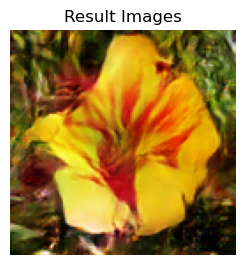

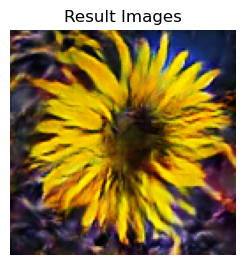

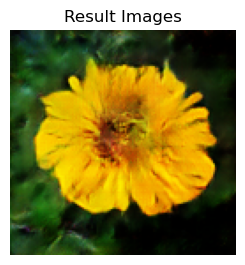

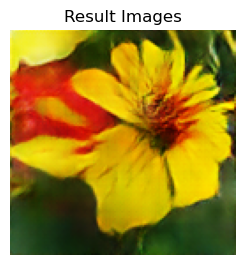

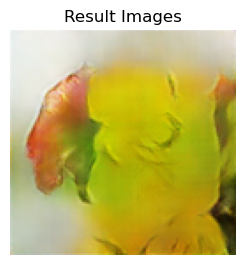

In [7]:
candidates = []
convert_tensor = transforms.ToTensor()
for filesname in cadidates_image_files:
    img = Image.open(os.path.join(fake_image_dir, filesname))
    candidates.extend([convert_tensor(img)])
for candidate in candidates:
    plt.subplot(1, 2, 2)
    plt.axis("off")
    plt.title("Result Images")
    plt.imshow(np.transpose(candidate,(1, 2, 0)))
    plt.show()